Import the libraries needed for the data analysis. 

In [2]:
import requests
import json
import time
import csv
import pandas as pd
import sklearn
import numpy as np
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

/anaconda2/envs/dsi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mine reddit.com for five sub-reddits: nba, dogs, nfl, cars, and pizza. 
Our goal is to correctly identify reddit posts that belong in the nba but at the same time we want it to have more data to help our model differentiate posts that belong in the nba from other categories. 

In [4]:
url = "http://www.reddit.com/r/nba.json"
url_2 = "http://www.reddit.com/r/dogs.json"
url_3 = "http://www.reddit.com/r/nfl.json"
url_4 = "http://www.reddit.com/r/cars.json"
url_5 = "http://www.reddit.com/r/pizza.json"

In [5]:
res = requests.get(url)
res = requests.get(url, headers={'User-agent': 'Vijay Bot 0.1'})
res2 = requests.get(url_2)
res2 = requests.get(url_2, headers={'User-agent': 'Vijay Bot 0.1'})
res3 = requests.get(url_3)
res3 = requests.get(url_3, headers={'User-agent': 'Vijay Bot 0.1'})
res4 = requests.get(url_4)
res4 = requests.get(url_4, headers={'User-agent': 'Vijay Bot 0.1'})
res5 = requests.get(url_4)
res5 = requests.get(url_4, headers={'User-agent': 'Vijay Bot 0.1'})

Put the reddit.com data into a more readable format to python. This is called Javascript Object Notation(JSON). 

In [6]:
data = res.json()
data2 = res2.json()
data3 = res3.json()
data4 = res4.json()
data5 = res5.json()

Mine reddit.com for nba posts so our model knows what nba subreddit posts consist of. 

In [7]:
all_posts = []
url = 'http://www.reddit.com/r/nba.json?after='
#each of these requests below does 26 and then 25 posts
for i in range(28):
    res = requests.get(url, headers={'User-agent': 'vijay'})
    data = res.json()
    for i in range(25):
        post = []
        post.append(data['data']['children'][i]['data']['title'])
        post.append(data['data']['children'][i]['data']['selftext'])
        post.append(data['data']['children'][i]['data']['subreddit'])
#     post.append(data['data']['children']['title'])
#     post.append(data['data']['children']['subreddit_name_prefixed'])
#     all_posts.append(post)
        all_posts.append(post)
    after = data['data']['after']
    url = 'http://www.reddit.com/r/nba.json?after=' + after
    
    #print('The current after: ', after)
    time.sleep(3)

Mine reddit.com for posts in the sub-reddit dogs. This will be one of the categories not in nba so the model can better differentiate. 

In [8]:
url = 'http://www.reddit.com/r/dogs.json?after='
#each of these requests below does 26 and then 25 posts
for i in range(28):
    res2 = requests.get(url, headers={'User-agent': 'vijay'})
    data2 = res2.json()
    for i in range(25):
        post = []
        post.append(data2['data']['children'][i]['data']['title'])
        post.append(data2['data']['children'][i]['data']['selftext'])
        post.append(data2['data']['children'][i]['data']['subreddit'])
#     post.append(data['data']['children']['title'])
#     post.append(data['data']['children']['subreddit_name_prefixed'])
#     all_posts.append(post)
        all_posts.append(post)
    after = data2['data']['after']
    url = 'http://www.reddit.com/r/dogs.json?after=' + after
    
    
    #print('The current after: ', after)
    time.sleep(3)

Mine reddit.com for posts found in the subreddit nfl. This would be to help differentiate nba posts from other sports-related posts. 

In [9]:
url = 'http://www.reddit.com/r/nfl.json?after='
#each of these requests below does 26 and then 25 posts
for i in range(28):
    res3 = requests.get(url, headers={'User-agent': 'vijay'})
    data3 = res3.json()
    for i in range(25):
        post = []
        post.append(data3['data']['children'][i]['data']['title'])
        post.append(data3['data']['children'][i]['data']['selftext'])
        post.append(data3['data']['children'][i]['data']['subreddit'])
#     post.append(data['data']['children']['title'])
#     post.append(data['data']['children']['subreddit_name_prefixed'])
#     all_posts.append(post)
        all_posts.append(post)
    after = data3['data']['after']
    url = 'http://www.reddit.com/r/nfl.json?after=' + after
    
    #print('The current after: ', after)
    time.sleep(3)

Mine reddit.com for another category of unrelated data. This category is cars. 

In [12]:
url = 'http://www.reddit.com/r/cars.json?after='
#each of these requests below does 26 and then 25 posts
for i in range(23):
    res4 = requests.get(url, headers={'User-agent': 'vijay'})
    data4 = res4.json()
    for i in range(25):
        post = []
        post.append(data4['data']['children'][i]['data']['title'])
        post.append(data4['data']['children'][i]['data']['selftext'])
        post.append(data4['data']['children'][i]['data']['subreddit'])
#     post.append(data['data']['children']['title'])
#     post.append(data['data']['children']['subreddit_name_prefixed'])
#     all_posts.append(post)
        all_posts.append(post)
    after = data4['data']['after']
    url = 'http://www.reddit.com/r/cars.json?after=' + after
    
    #print('The current after: ', after)
    time.sleep(3)

Mine reddit.com for yet another sub-reddit different from the nba. I chose pizza. 

In [14]:
url = 'http://www.reddit.com/r/pizza.json?after='
#each of these requests below does 26 and then 25 posts
for i in range(28):
    res5 = requests.get(url, headers={'User-agent': 'vijay'})
    data5 = res5.json()
    for i in range(25):
        post = []
        post.append(data5['data']['children'][i]['data']['title'])
        post.append(data5['data']['children'][i]['data']['selftext'])
        post.append(data5['data']['children'][i]['data']['subreddit'])
#     post.append(data['data']['children']['title'])
#     post.append(data['data']['children']['subreddit_name_prefixed'])
#     all_posts.append(post)
        all_posts.append(post)
    after = data5['data']['after']
    url = 'http://www.reddit.com/r/pizza.json?after=' + after
    
    #print('The current after: ', after)
    time.sleep(3)

Write these reddit posts to a csv file for easier access later. Mining reddit.com can be a time-consuming process. 

In [23]:
df = pd.DataFrame(all_posts, columns = ['Title','Text','Category'])
df.to_csv("scraped-data-multinomial.csv", sep='\t')

Below, I will create the term-frequency inverse document frequency vectorizer. Why is this vectorizer important? The term-frequency inverse document frequency vectorizer also counts word frequencies but it adjusts for words that occur more frequently. Such words include "the", "and", "but" that occur frequently but do not really add much value to the meaning of the post.

In [3]:
vectorizer = CountVectorizer(input='./scraped-data.csv', stop_words=sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)
data = pd.read_csv('scraped-data-multinomial.csv',sep='\t')
data["Category"] = data["Category"].map(lambda x: 'nba' in x)*1

We want to check for null values

In [4]:
data["Text"].isnull().value_counts()

True     2956
False    2315
Name: Text, dtype: int64

We will remove the null values from the text by replacing those with the titles. 

In [8]:
if data["Text"].isna:
    data["Text"] = data["Title"]

In [9]:
output = vectorizer.fit_transform(data.Text.values.astype('U'))

The data in both output and tfidf_output need to be parsed into a format that can be readable by the train-test-split model, which is the next step in our process. For this reason, both are converted into arrays. 

In [10]:
train_data_features = output.toarray()

Train-Test Split is a very important part of predicting unseen data. Train-test split allows us to divide the sample data into two categories: train and test. The data in the train category is the data that our model is fed to make its predictions. The data in the test category is the data our model is exposed to and is expected to make predictions from using the data the model was fed in the train data. In our case, we will be making predictions of what posts belong in the sub-reddit nba.

In [11]:
## YOUR CODE HERE

x = train_data_features
y = data["Category"]
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(train_data_features, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

Let's look at the breakdown of reddit posts categorized as nba posts and reddit posts not categorized as nba posts. 

/anaconda2/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


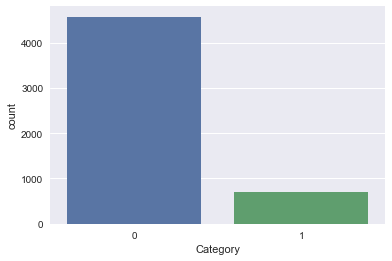

In [12]:
sns.countplot(data["Category"])

First, we will use the logistic regression model to predict the categories of posts.

In [13]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Accuracy

Accuracy = (True Positive + True Negative)/(Total Number of Values)

How accurate is the logistic regression model?

In [14]:
predicted = logistic.predict(x_train)
train_score = logistic.score(x_train, y_train)
score = logistic.score(x_test, y_test)
print(score)

0.9056603773584906


While the logistic regression model holds value in correctly predicting which category the reddit post belongs in, it is still important to test other statistical models. One such model would be the Random Forest Classification Model. The Random Forest Classification Model is an ensemble model that creates multiple trees using different combinations of features of the reddit posts such as the title or the reddit text content and at the end chooses the best performing tree. We want to compare the accuracy score of a random forest classification model with the logistic regression model.

In [15]:
## YOUR CODE HERE
param_grid = { 
    'n_estimators': [2, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}
gs = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9366892545982575
{'max_features': 'sqrt', 'n_estimators': 7}


In [16]:
print(classification_report(y_train, predicted))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4480
          1       1.00      0.93      0.96       685

avg / total       0.99      0.99      0.99      5165



Looking at the accuracy scores of the logistic regression model and the random forest classifier, we can clearly see that the Random Forest model is better able to correctly predict the categories of the posts. In this case, the Random Forest model is better able to predict the posts that belong in the nba subreddit.


While it is wonderful to have great accuracy scores, we want to find the top 50 words most commonly associated with the nba subreddit. 

In [14]:
columns=vectorizer.get_feature_names()
coef = pd.DataFrame(logistic.coef_, columns=columns)
df_coef = coef.T.sort_values(by = 0, ascending=False)
df_coef.head(10)

,0
nba,3.926095
lebron,2.471383
basketball,1.870832
kd,1.771122
deng,1.695037
goat,1.635428
finals,1.623049
wnba,1.608673
players,1.595735
lakers,1.571739


For a one unit increase in the word "nba", the probability of a reddit post being an nba subreddit increases by 3.92 times. 